# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [3]:
import keras
%pip install tensorflow --upgrade
%pip install keras --upgrade
%pip install keras.utils 

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras import utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: C:\Users\Hiroyko\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.2
    Uninstalling keras-3.3.2:
      Successfully uninstalled keras-3.3.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: C:\Users\Hiroyko\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: C:\Users\Hiroyko\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [59]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [60]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))  
model.add(BatchNormalization())  
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(BatchNormalization()) 
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

Define some constants and train the MLP

In [61]:
# batch_size = 128
# n_epoch = 10
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 
# history = model.fit(X_train, Y_train,
#                     batch_size=batch_size, epochs=n_epoch,
#                     verbose=1, validation_split=0.1)

batch_size = 128
n_epoch = 50

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(weight_decay=1e-4), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8803 - loss: 1.2762 - val_accuracy: 0.9615 - val_loss: 0.5670
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9639 - loss: 0.4797 - val_accuracy: 0.9670 - val_loss: 0.3380
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9689 - loss: 0.3026 - val_accuracy: 0.9738 - val_loss: 0.2411
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9720 - loss: 0.2358 - val_accuracy: 0.9730 - val_loss: 0.2134
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9726 - loss: 0.2089 - val_accuracy: 0.9745 - val_loss: 0.1936
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9741 - loss: 0.1873 - val_accuracy: 0.9717 - val_loss: 0.1849
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9758 - loss: 0.1743 - val_accuracy: 0.9720 - val_loss: 0.1790
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9761 - loss: 0.1643 - val_accuracy: 0.

Show the performance of the model

Test score: 0.13777589797973633
Test accuracy: 0.9771999716758728


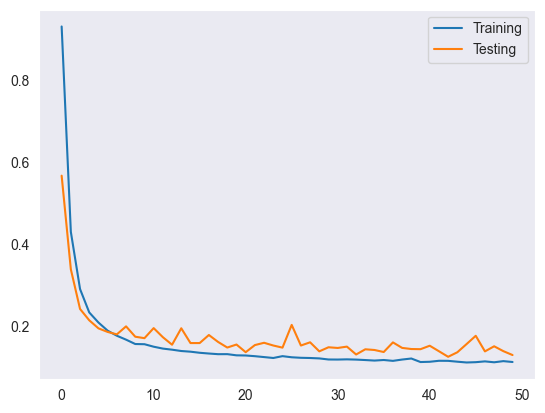

In [62]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ 957,    0,    0,    1,    2,    5,    4,    2,    4,    5],
       [   0, 1128,    3,    2,    0,    0,    2,    0,    0,    0],
       [   4,    2, 1004,    5,    6,    0,    3,    6,    2,    0],
       [   1,    0,    8,  987,    0,    4,    0,    2,    5,    3],
       [   0,    1,    2,    1,  973,    0,    2,    0,    0,    3],
       [   1,    2,    0,   19,    2,  854,    6,    0,    5,    3],
       [   4,    3,    0,    1,    7,    3,  938,    0,    2,    0],
       [   0,    3,    9,    1,    2,    1,    0, 1004,    0,    8],
       [   2,    1,    2,    4,    3,    1,    1,    4,  952,    4],
       [   0,    3,    1,    6,   14,    2,    0,    6,    2,  975]],
      dtype=int64)